In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Sahil/Downloads/nursery.csv')
df.columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target']

In [2]:
def preprocess(df):
    new_cols = []
    df_tr = pd.DataFrame()
    for item in df.columns[0:len(df.columns)-1]:
        df_tr = pd.concat([df_tr, pd.get_dummies(df[item], prefix=item)], axis=1)
    df_tr[df.columns[len(df.columns)-1]] = df[df.columns[len(df.columns)-1]]
    return df_tr

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [3]:
df = preprocess(df)

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm

np_df = np.array(df)[:,0:27]
df_dist = pd.DataFrame()
df_dist.cols = [i for i in range(0,len(df))]

print('Creating distance matrix...')
for i in tqdm(range(0,len(np_df))):
    c = abs(np_df - np_df[i])
    df_dist[i] = list(c.sum(axis=1))
    
print('Saving distance matrix to disk...')    
df_dist.to_csv('distance_matrix.csv')    

C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
100%|████████████████████████████████████| 12959/12959 [18:56<00:00, 12.77it/s]


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
test['indexes'] = test.index
df_dist = df_dist.drop(list(test['indexes']))

In [70]:
accuracy = []

for k in range(1,200,5):
    print('Running for k = ', k)
    preds = []
    for item in tqdm(list(test['indexes'])):    
        index_list = list(df_dist_new[item].sort_values().index[0:k])
        neighbors = list(df.iloc[index_list]['target'])
        prediction = Counter(neighbors).most_common(1)[0][0]
        preds.append(prediction)
    acc = getAccuracy(list(test['target']), preds)
    print('Accuracy: ', acc)   
    accuracy.append(acc)

100%|█████████████████████████████████████| 2592/2592 [00:12<00:00, 211.33it/s]


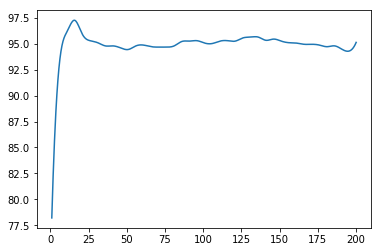

In [82]:
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import numpy as np

T = np.array([i for i in range(1,200,5)])
xnew = np.linspace(1,200,900) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(T, np.array(accuracy), k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)

print('k versus accuracy plot')
plt.show()

In [83]:
acc_dictionary = dict(zip(accuracy,T))

In [89]:
best_k = acc_dictionary.get(max(acc_dictionary.keys()))
print('best k values is: 'best_k)

16


In [90]:
results = pd.DataFrame()
results['k_value'] = T
results['accuracy'] = accuracy
results.to_csv('accuracy.csv')